     instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          0       1   0     1        0        6           0           2   
1          1       1   0     1        0        0           0           2   
2          2       1   0     1        0        1           1           1   
3          3       1   0     1        0        2           1           1   
4          4       1   0     1        0        3           1           1   
..       ...     ...  ..   ...      ...      ...         ...         ...   
726      726       1   1    12        0        4           1           2   
727      727       1   1    12        0        5           1           2   
728      728       1   1    12        0        6           0           2   
729      729       1   1    12        0        0           0           1   
730      730       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed   cnt  
0    0.344167  0.363625  0.805833 

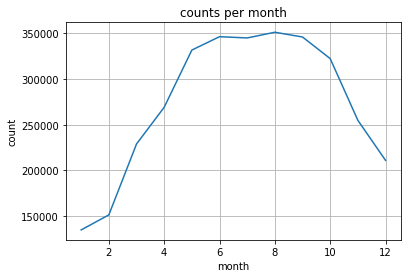

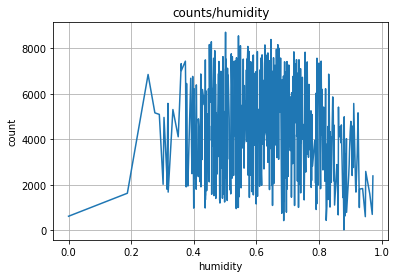

In [ ]:
import numpy.linalg as la
import numpy as np
import pandas
import matplotlib.pyplot as plt

path = "/content/bike_sharing_rental.csv"
df = pandas.read_csv(path)
print(df)
counts_per_months = {i+1:0 for i in range(12)}
n = len(df)
for i in range(n):
    counts_per_months[df.loc[i, "mnth"]] += df.loc[i, "cnt"]  

print(counts_per_months)

fig = plt.figure()
plt.title("counts per month")
plt.ylabel("count")
plt.xlabel("month")
plt.plot(counts_per_months.keys(), counts_per_months.values())
plt.grid()
plt.show()
plt.close()

counts_humidity = {}
for i in range(n):
    counts_humidity[df.loc[i, "hum"]] = df.loc[i, "cnt"]  

x = sorted(counts_humidity.keys())
y = [counts_humidity[i] for i in x]
fig = plt.figure()
plt.title("counts/humidity")
plt.ylabel("count")
plt.xlabel("humidity")
plt.plot(x, y)
plt.grid()
plt.show()
plt.close()



In [187]:
counts_per_temp = {}
n = len(df)
for i in range(n):
    if df.loc[i, "temp"] in counts_per_temp.keys():
      counts_per_temp[df.loc[i, "temp"]] += df.loc[i, "cnt"]  
    else:
      counts_per_temp[df.loc[i, "temp"]] = df.loc[i, "cnt"]

v = list(counts_per_temp.values())
k = list(counts_per_temp.keys())
print(f"temp = {k[v.index(max(v))]}")


temp = 0.564167


In [213]:
columns = df.columns[1:-1]
n = len(df)
n_train = int(0.8 * n)
n_test = n - n_train
train_data = df[:n_train]
test_data = df[n_train:]

X_train = np.matrix([list(train_data.loc[:, x]) for x in columns]).T
y_train = np.matrix(train_data["cnt"]).T
X_test = np.matrix([list(test_data.loc[:, x]) for x in columns]).T
y_test = np.matrix(test_data["cnt"]).T

beta = la.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_predicted_train = (X_train @ beta).reshape(-1)
y_predicted_test = (X_test @ beta).reshape(-1)

train_error = np.linalg.norm(y_predicted_train - y_train)
test_error = np.linalg.norm(y_predicted_train - y_train)

print(train_error)
print(test_error)

1421333.1164021215
1421333.1164021215


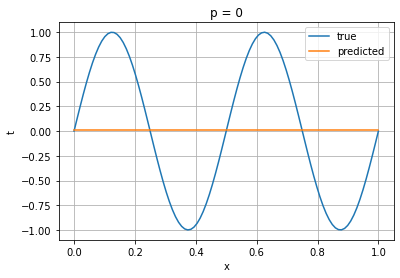

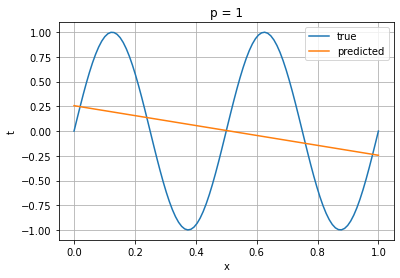

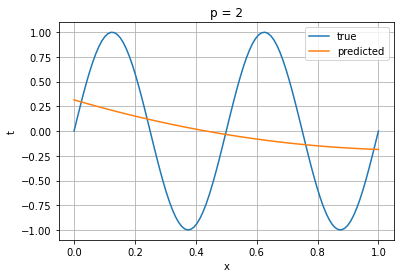

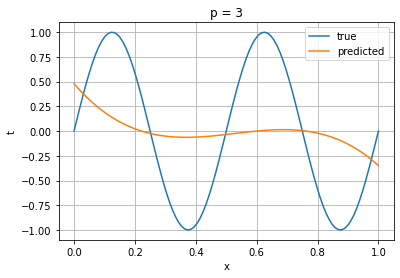

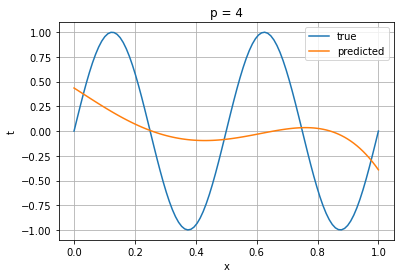

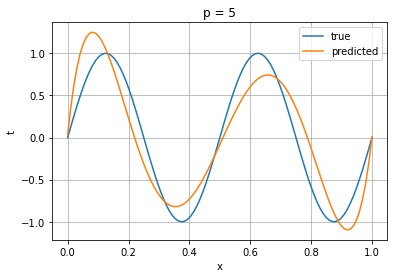

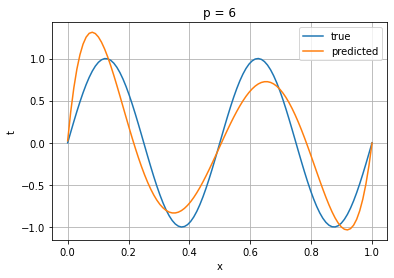

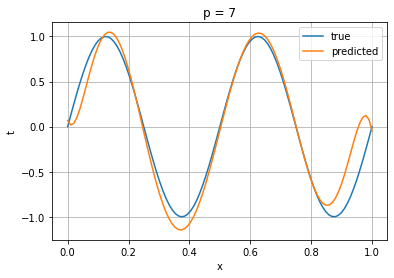

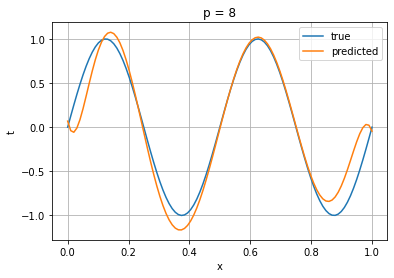

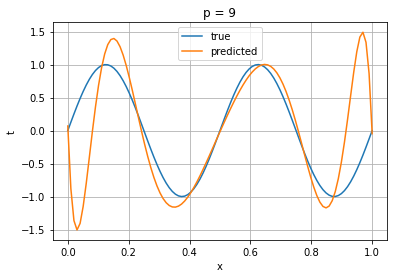

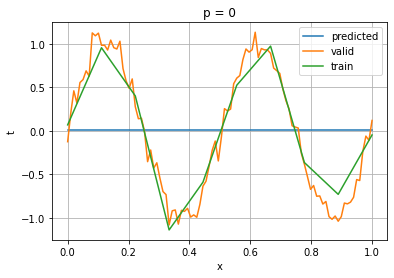

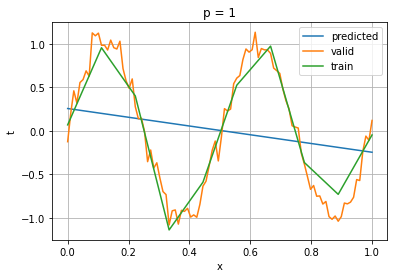

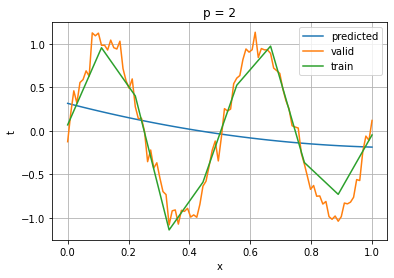

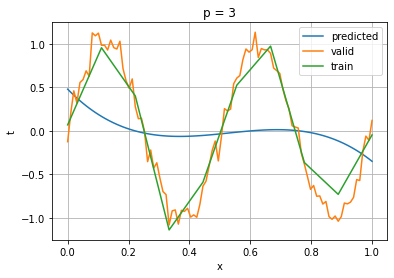

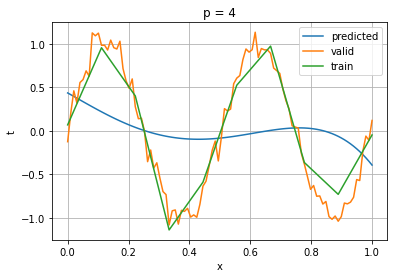

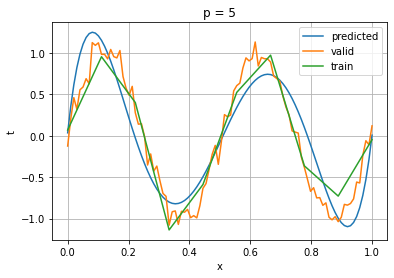

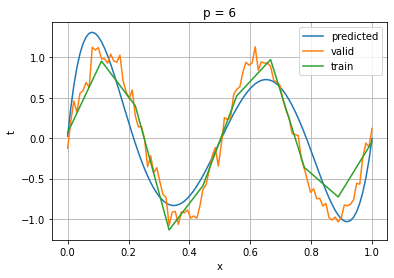

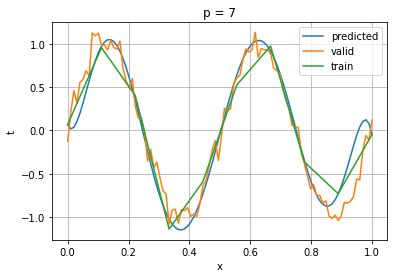

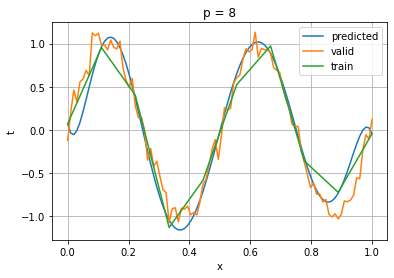

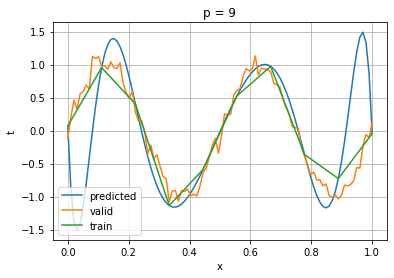

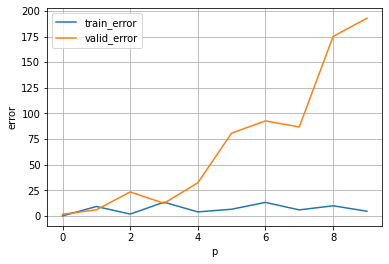

In [210]:
import numpy as np
n_train = 10
n_valid = 100

x_train = np.linspace(0, 1, n_train, endpoint=True)
x_valid = np.linspace(0, 1, n_valid, endpoint=True)

t_train = np.sin(4 * np.pi * x_train) + np.random.normal(0, 0.09, n_train)
t_valid = np.sin(4 * np.pi * x_valid) + np.random.normal(0, 0.09, n_valid)

T_train_predicted = []
T_valid_predicted = []

for i in range(10):
    X = np.matrix([x_train**k for k in range(i+1)]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ np.matrix(t_train).T
    
    T_train_predicted.append(np.matrix([x_train**k for k in range(i+1)]).T @ beta)
    T_valid_predicted.append(np.matrix([x_valid**k for k in range(i+1)]).T @ beta)

train_error = [np.linalg.norm(T_train_predicted[i] - t_train[i])**2 for i in range(10)]
valid_error = [np.linalg.norm(T_valid_predicted[i] - t_valid[i])**2 for i in range(10)]


for i in range(10):
      #plt.subplot(len(T_predicted), 1, i+1)
      plt.title(f"p = {i}")
      plt.ylabel("t")
      plt.xlabel("x")
      plt.plot(x_valid, np.sin(4 * np.pi * x_valid), label='true')
      plt.plot(x_valid, T_valid_predicted[i], label='predicted')
      plt.legend()
      plt.grid()  
      plt.show()
      plt.close()


for i in range(10):
      #plt.subplot(len(T_predicted), 1, i+1)
      plt.title(f"p = {i}")
      plt.ylabel("t")
      plt.xlabel("x")
      plt.plot(x_valid, T_valid_predicted[i], label='predicted')
      plt.plot(x_valid, t_valid, label='valid')
      plt.plot(x_train, t_train, label='train')
      plt.legend()
      plt.grid()  
      plt.show()
      plt.close()


plt.ylabel("error")
plt.xlabel("p")
x = list(range(0, 10))
plt.plot(x, train_error, label='train_error')
plt.plot(x, valid_error, label='valid_error')
plt.legend()
plt.grid()  
plt.show()
plt.close()